# Reologia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deformation = 0.5
dt_tectonic = 2.0e6


sec_per_year = 365.0*24*3600

ep = deformation/(dt_tectonic*sec_per_year)


In [3]:
lithosphere_depth = 150e3
dz = 1e3

depth = np.arange(0,lithosphere_depth,dz)

rho_mantle = 3300.0
rho_crust = 2800.0

depth_crust = 40.0e3
rho = depth*0

rho[depth<depth_crust] = rho_crust
rho[depth>=depth_crust] = rho_mantle

Text(0, 0.5, 'Depth [m]')

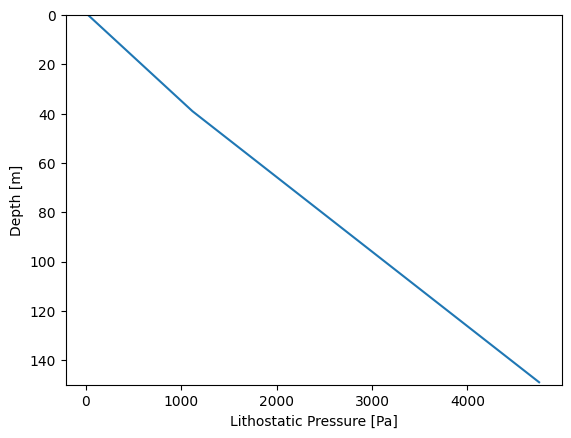

In [4]:
g = 10.0 #m/s²

sv1 = 0.0 
sv = [] # esforço vertical por conta da pressão litostática

for value in rho:
    sv1 += value*g*dz
    sv = np.append(sv,sv1)

plt.plot(sv/1.0e6, depth/1.0e3)
plt.ylim(lithosphere_depth/1.0e3,0)
plt.xlabel("Lithostatic Pressure [Pa]")
plt.ylabel("Depth [m]")

Text(0, 0.5, 'Depth [m]')

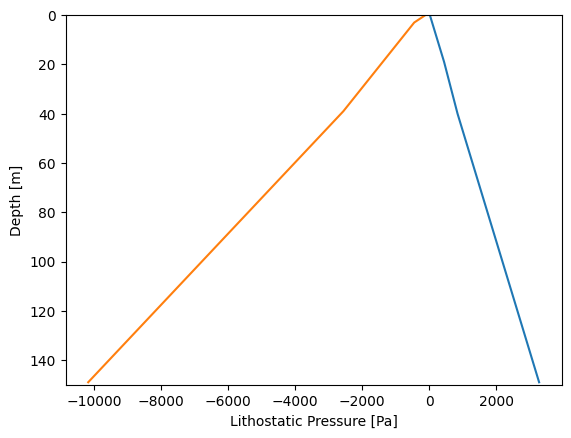

In [5]:
s3 = sv/5

cond = s3 > 110.0e6

s3[cond] = (sv[cond] - 210.0e6) / 3.1

s_tension = sv-s3
s1 = 5*sv
cond = sv>110.0e6

s1[cond] = 3.1*sv[cond]+210e6

s_compression = sv-s1

plt.plot(s_tension/1e6, depth/1e3)

plt.plot(s_compression/1.0e6, depth/1.0e3)
plt.ylim(lithosphere_depth/1.0e3,0)
plt.xlabel("Lithostatic Pressure [Pa]")
plt.ylabel("Depth [m]")